In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from xgboost import XGBRegressor as XGBR

filterwarnings("ignore")

In [2]:
features = pd.read_excel(r"/opt/jupyter_data/model/feature/final_features.xlsx")
target = pd.read_excel(r"/opt/jupyter_data/model/feature/final_data.xlsx")

In [3]:
def importance_score(df, y):
    """The function gets the XGBoost importance score and the top ten features with importance."""    
    model = XGBR(random_state=42)
    reg = model.fit(df.values, y)
    # # get importance score
    importance = reg.feature_importances_
    # importance score ranking
    importance = pd.DataFrame(sorted(zip(importance, df.columns), reverse=True))
    # set columns name
    importance.columns = ['importance score', 'feature']
    
    # parameter assignment
    font = {'family': 'Times New Roman',
            'size': 20}
    labelsize = 24
    # take the top 10 features for the importance score
    top10 = importance[:10]
    fig, ax = plt.subplots(figsize=(15, 5))
    # draw a bar chart
    ax.bar(top10['feature'], top10['importance score'], 0.5)
    # set the label and font size of the y-axis
    ax.set_ylabel('importance score', font)
    # set the x-axis tick labels
    ax.set_xticklabels(top10['feature'], rotation=45)
    # set tick label font size
    plt.tick_params(labelsize=labelsize)
    # set the font of the x-axis and y-axis tick values
    labels = ax.get_xticklabels()+ax.get_yticklabels()
    [label.set_fontname('Times New Roman') for label in labels]
    # set the range of y
    plt.ylim(0, 0.1)
    plt.show()

    return importance, top10

In [4]:
def mcorr_score(df, y):
    """This function calculates the relevance score."""
    df['target'] = y
    plt.figure(figsize=(225, 225))
    column = df.columns.tolist()
    # get relevance score
    mcorr = df[column].corr(method="spearman")
    # constructs a new matrix of the same dimension as mcorr
    mask = np.zeros_like(mcorr, dtype=bool)
    # upper triangular matrix
    mask[np.triu_indices_from(mask)] = True
    cmap = sns.color_palette("bwr_r", 200)
    # draw a heatmap
    sns.heatmap(mcorr, vmin=-1, vmax=1, mask=mask, cmap=cmap, square=True, annot=True, fmt='0.2f')
    plt.show()
    return mcorr

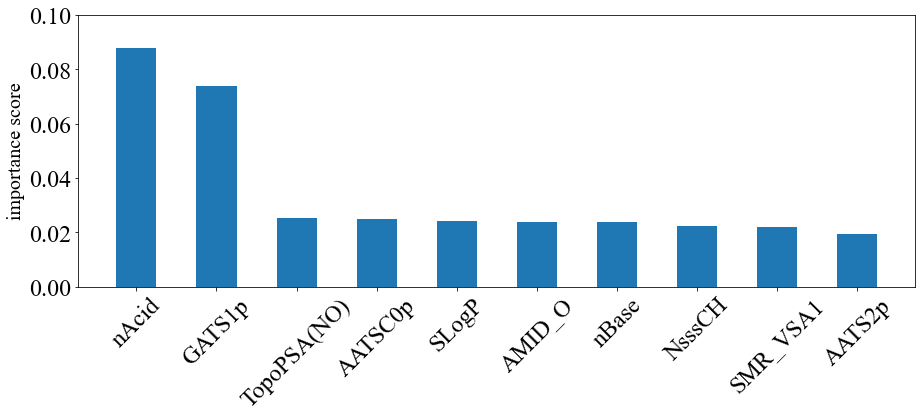

In [5]:
# calculate feature importance score
importance_score, top10_score = importance_score(features, target['logVDss'])

In [6]:
# calculate relevance scores and draw heatmaps
corr_score = mcorr_score(features, target['logVDss'])

In [7]:
# relevance scores corresponding to the top ten most important features
for i in top10_score['feature']:
    print(corr_score.loc[i, 'target'])

-0.5520920430061562
0.05717732613857853
-0.38752078988406724
-0.19563699882381483
0.29504736595601305
-0.38920100118529755
0.32584714270796855
-0.07962732786219437
-0.33793251711438554
-0.15442002918918812


In [8]:
# Output the specific scores of the top ten feature importance scores and the corresponding features
print(top10_score)

   importance score      feature
0          0.087852        nAcid
1          0.073717       GATS1p
2          0.025254  TopoPSA(NO)
3          0.024839      AATSC0p
4          0.024314        SLogP
5          0.023839       AMID_O
6          0.023785        nBase
7          0.022317       NsssCH
8          0.022035     SMR_VSA1
9          0.019331       AATS2p
